In [1]:
# This handy piece of code changes Jupyter Notebooks margins to fit your screen.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# This is a tutorial on euclidian distance, cosine similarity, and pearson correlation on a simple movie recommender system.  
##### This tutorial was adapted from these sites https://cmry.github.io/notes/euclidean-v-cosine and http://guidetodatamining.com/assets/guideChapters/DataMining-ch2.pdf

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Create an array with movie ratings
x = np.array([[4, 2],
              [1, 4],
             [1, 3]])

In [4]:
# Convert the array to a data frame and label the columns and rows
df = pd.DataFrame(x, columns = ['Action', 'Comedy'], index = ['Amy', 'Bill', 'Clark'])
df

,Action,Comedy
Amy,4,2
Bill,1,4
Clark,1,3


### Above is a data frame that has the movie genere rating for Amy, Bill, and Clark. Is Clark's movie genere preference more similar to Amy's or Bill's?  If we were to recommend a new movie genere to Clark would we recommend a genere that Amy rates highly or one that Bill rates highly?

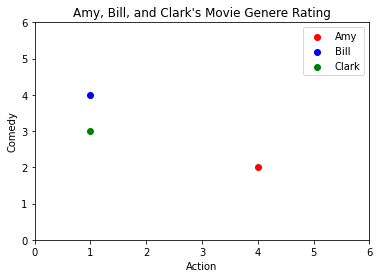

In [5]:
# Plot the data
plt.scatter(df.loc['Amy','Action'], df.loc['Amy','Comedy'], color = 'Red', label = 'Amy')
plt.scatter(df.loc['Bill','Action'], df.loc['Bill','Comedy'], color = 'Blue', label = 'Bill')
plt.scatter(df.loc['Clark','Action'], df.loc['Clark','Comedy'], color = 'Green', label = 'Clark')
plt.legend()
plt.title("Amy, Bill, and Clark's Movie Genere Rating")
plt.xlabel('Action')
plt.ylabel('Comedy')
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

#### In this simple system we can visually see that Clark movie genere preference is more closely related to Bill's than Amy's but we will calculate the Euclidian distance and cosine similarity values to be sure.

In [6]:
# Define a function to calculate the Euclidian distance
def euclidian_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [7]:
# Calculate the Euclidian distance between Amy and Clarke and Bill and Clark
print("Distance between Amy and Clark:", euclidian_distance(df.loc['Amy'], df.loc['Clark']), "\n",
      "Distance bewteen Bill and Clark:",euclidian_distance(df.loc['Bill'], df.loc['Clark']))

Distance between Amy and Clark: 3.1622776601683795 
 Distance bewteen Bill and Clark: 1.0


In [8]:
# Define a function to calculate the cosine simularity
def cosine_similarity(x,y):
    return np.dot(x,y)/(np.sqrt(np.dot(x,x))* np.sqrt(np.dot(y,y)))

In [9]:
# Calculate the cosine simularity distance between Amy and Clarke and Bill and Clark
print("Cosine between Amy and Clark:", cosine_similarity(df.loc['Amy'], df.loc['Clark']), "\n",
      "Cosine between Bill and Clark:",cosine_similarity(df.loc['Bill'], df.loc['Clark']))

Cosine between Amy and Clark: 0.7071067811865475 
 Cosine between Bill and Clark: 0.9970544855015815


#### The Euclidian distance between Clark and Bill is smaller than the distance between Clark and Amy.  And the cosine similarity between Bill and Clark is closer to 1 than it is for Amy and Clark.  Therefore, we can conclude that Clark and Bill have a more silimlar taste in movie generes and we would recommend movie generes that Bill rates highly to Clark.

## Let's include more dimentions to the matrix (more movie generes) and build another recommender for Clark

In [10]:
# Create a larger movie matrix data frame with more dimentions (movie generes)
b = np.array([[4, 2, 5, 4, 3],
              [1, 4, 3, 5, 2],
             [1, 3, 2, 3, 1]])
dfb = pd.DataFrame(b, columns = ['Action', 'Comedy', 'Romance', 'Sci-Fi', 'Drama'], index = ['Amy', 'Bill', 'Clark'])
dfb

,Action,Comedy,Romance,Sci-Fi,Drama
Amy,4,2,5,4,3
Bill,1,4,3,5,2
Clark,1,3,2,3,1


#### Now we have added more dimentions (movie generes) is Clark's movie preference still more similar to Bill's than Amy's?  Even though we have more dimentions to our data, the Euclidian distance and cosine similarity calculations are the same.

In [11]:
# Calculate the Euclidian distance between Amy and Clarke and Bill and Clark with more dimentional data
print("Distance between Amy and Clark:", euclidian_distance(dfb.loc['Amy'], dfb.loc['Clark']), "\n",
      "Distance bewteen Bill to Clark:",euclidian_distance(dfb.loc['Bill'], dfb.loc['Clark']))

Distance between Amy and Clark: 4.898979485566356 
 Distance bewteen Bill to Clark: 2.6457513110645907


In [12]:
# Calculate the cosine simularity distance between Amy and Clarke and Bill and Clark with more dimentional data
print("Cosine between Amy and Clark:", cosine_similarity(dfb.loc['Amy'], dfb.loc['Clark']), "\n",
      "Cosine between Bill and Clark:",cosine_similarity(dfb.loc['Bill'], dfb.loc['Clark']))

Cosine between Amy and Clark: 0.8539125638299666 
 Cosine between Bill and Clark: 0.9908673886137246


#### The Euclidian distance and cosine similartiy still agree that Clark's genere preference is closer to Bill's than Amy's

### Let's plot Amy's and Clark's genere rating and Bill's and Clark's genere rating and calculate a Pearson's coefficient between them.

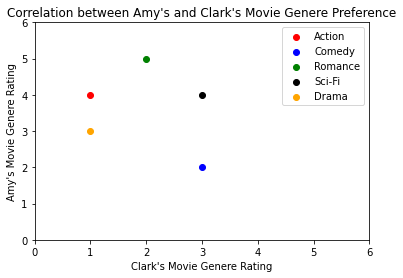

In [13]:
# Plot Amy's genere rating vs Clark's genere rating 
plt.scatter(dfb.loc['Clark','Action'],dfb.loc['Amy','Action'], color = 'Red', label = 'Action')
plt.scatter(dfb.loc['Clark','Comedy'],dfb.loc['Amy','Comedy'], color = 'Blue', label = 'Comedy')
plt.scatter(dfb.loc['Clark','Romance'],dfb.loc['Amy','Romance'], color = 'Green', label = 'Romance')
plt.scatter(dfb.loc['Clark','Sci-Fi'],dfb.loc['Amy','Sci-Fi'], color = 'Black', label = 'Sci-Fi')
plt.scatter(dfb.loc['Clark','Drama'],dfb.loc['Amy','Drama'], color = 'Orange', label = 'Drama')
plt.legend()
plt.title("Correlation between Amy's and Clark's Movie Genere Preference")
plt.xlabel("Clark's Movie Genere Rating")
plt.ylabel("Amy's Movie Genere Rating")
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

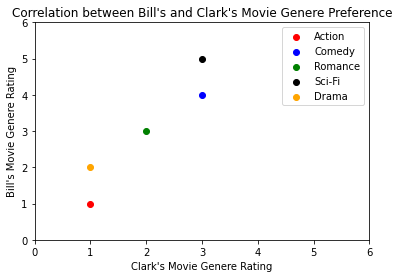

In [14]:
# Plot Bill's genere rating vs Clark's genere rating 
plt.scatter(dfb.loc['Clark','Action'],dfb.loc['Bill','Action'], color = 'Red', label = 'Action')
plt.scatter(dfb.loc['Clark','Comedy'],dfb.loc['Bill','Comedy'], color = 'Blue', label = 'Comedy')
plt.scatter(dfb.loc['Clark','Romance'],dfb.loc['Bill','Romance'], color = 'Green', label = 'Romance')
plt.scatter(dfb.loc['Clark','Sci-Fi'],dfb.loc['Bill','Sci-Fi'], color = 'Black', label = 'Sci-Fi')
plt.scatter(dfb.loc['Clark','Drama'],dfb.loc['Bill','Drama'], color = 'Orange', label = 'Drama')
plt.legend()
plt.title("Correlation between Bill's and Clark's Movie Genere Preference")
plt.xlabel("Clark's Movie Genere Rating")
plt.ylabel("Bill's Movie Genere Rating")
plt.xlim(0,6)
plt.ylim(0,6)
plt.show()

In [15]:
# Import the pearsonr funtion from the scipy.stats.stats library
from scipy.stats.stats import pearsonr 

In [16]:
# Calulate the Pearson coefficent between each user and Clark
print("Pearson's Coefficient between Amy and Clark:", pearsonr(dfb.loc['Amy'], dfb.loc['Clark']), "\n",
      "Pearson's Coefficient between Bill and Clark:", pearsonr(dfb.loc['Bill'], dfb.loc['Clark']))

Pearson's Coefficient between Amy and Clark: (-0.21926450482675727, 0.7230771665710751) 
 Pearson's Coefficient between Bill and Clark: (0.9486832980505138, 0.013846832988859062)


### Person's coefficient agrees that Clark's genere preference is more similar to Bill's than Amy's and therefore we would use Bill's movie ratings to help inform and recommend movies to Clark

# Let's look at the Euclidian and cosine differences in text analysis
#### This tutorial is adapted from here. https://cmry.github.io/notes/euclidean-v-cosine 
##### You may have to install the wikipedia and scikit-learn packages from your terminal: 
##### > pip install wikipedia
##### > conda install scikit-learn 

We will consider if the Machine Learning wikipedia page is more similar to the Artifical Intelligence, Baseball, or Garfield page using the Euclidian distance and cosine similarity metrics.  Then we will compare the similarities in an OpenAI tweet to the Wikipedia pages

In [17]:
# Import Wikipedia and a text vectorization package from sklearn
from sklearn.feature_extraction.text import CountVectorizer
import wikipedia

In [49]:
# Download articles from Wikipedia
AI = wikipedia.page('Artifical Intelligence')
ML = wikipedia.page("ML (programming language)")
BB = wikipedia.page('Baseball')
G = wikipedia.page('Garfield')

In [50]:
# The stop_words='english' are a list of common english words that will be removed from the count vectorization
# The CountVectorization.fit_transform() function from SKlearn splits the text and and counts the unique occurance of the words.
# Very similar to a mapreduce function. The todense() function puts them into marrix form
cv = CountVectorizer(stop_words = 'english')
X = np.array(cv.fit_transform([AI.content, ML.content, BB.content, G.content]).todense())
print(X)
print(X.shape)

[[1 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [2 1 1 ... 1 0 0]]
(4, 4943)


In [51]:
# Let's see the feature names, or mapped values are
print(cv.get_feature_names())

['000', '001', '006', '01', '03', '031', '048', '05', '06', '08', '08750', '10', '100', '101', '10th', '11', '111', '12', '13', '14', '15', '16', '17', '18', '1861', '1863', '1891', '1892', '1893', '1895', '1896', '1897', '1898', '1899', '19', '1901', '1904', '1905', '1906', '1907', '1910', '1915', '1917', '1920s', '1924', '1925', '1926', '1928', '1929', '1930', '1932', '1936', '1937', '1938', '1939', '1940', '1940s', '1941', '1942', '1943', '1946', '1948', '1949', '1950', '1950s', '1951', '1954', '1955', '1956', '1959', '1960', '1960s', '1961', '1964', '1967', '1968', '1969', '1970', '1970s', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '20', '2001', '2002', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2010s', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'

In [52]:
# Lets see how many words are in each document
print("AI word length      \t", len(AI.content.split()), "\n"
      "ML word length      \t", len(ML.content.split()), "\n"
      "Baseball word length\t", len(BB.content.split()), "\n"
      "Garfield word length \t", len(G.content.split()))


AI word length      	 10518 
ML word length      	 1180 
Baseball word length	 10211 
Garfield word length 	 5313


Euclidian distance is magnitude dependent. Therefore we would think the euclidiane distance metric will say that the 
machine learning wikipedia page is more similar to the Garfield page than the AI page becuase they are closer in size.

In [55]:
print("AI - ML\t", euclidian_distance(X[0], X[1]), "\n"
      "AI - G\t", euclidian_distance(X[0], X[3]))

AI - ML	 289.67913283493516 
AI - G	 354.1087403609236


We can see that according the eculidian distance metric the ML page is more similar to the Garfield page than AI.  That does not seem right...

The cosine similarity metric is not magnitude dependent and therefore we would imaging that AI is more similar to 
the machine learning page than the Garfield page

In [56]:
print("ML - AI\t", cosine_similarity(X[0], X[1]), "\n"
      "ML - G\t", cosine_similarity(X[0], X[3]))

ML - AI	 0.09391797747270726 
ML - G	 0.05587565946003011


Here we see that the ML and AI pages are more similar than the others.  That is a more intuitively correct result.

###### Lets consider an OpenAI tweet to further demostrate the magnitude affect between euclidian distance and cosine similarity


In [33]:
ml_tweet=("We’ve trained a large-scale unsupervised language model which generates coherent paragraphs of text, achieves state-of-the-art performance on many language modeling benchmarks, and performs rudimentary reading comprehension, machine translation, question answering, and summarization—all without task-specific training.")
x = np.array(cv.transform([ml_tweet]).todense())
print("ml_tweet word length\t", len(ml_tweet.split()), "\n")
print(x.shape)

ml_tweet word length	 35 

(1, 4769)


In [39]:
print(x.tolist())
print(X[2].tolist())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
print("tweet - ML\t", euclidian_distance(x[0], X[0]), "\n"
      "tweet - AI\t", euclidian_distance(x[0], X[1]), "\n"
      "tweet - BB\t", euclidian_distance(x[0], X[2]))

ValueError: operands could not be broadcast together with shapes (4769,) (4943,) 

The openAI tweet eucilidian distance similarity follows the similirty in page legth. With Garfield being the most similar and shortest and AI being the least similar and longest

In [41]:
print("tweet - ML\t", cosine_similarity(x[0], X[0]), "\n"
      "tweet - AI\t", cosine_similarity(x[0], X[1]), "\n"
      "tweet - BB\t", cosine_similarity(x[0], X[2]))

tweet - ML	 0.09105601883854417 
tweet - AI	 0.011651668565806832 
tweet - BB	 0.01590582723055633


Finally, the cosine similarity matches what we would expect the OpenAI tweet to match.

# Analysis/Summary
Once you have completed going through the notebook, write a short analysis and summary of what we did, the results, and the significance.